## Classifying gender using names using Random Forest Classifier

### Importing all the requirements

In [2]:
# For Preprocessing
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelBinarizer

# For Training
from sklearn.ensemble import RandomForestClassifier

# For Validating
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, precision_recall_curve, auc, make_scorer, recall_score, accuracy_score, precision_score, confusion_matrix ,f1_score

# For Visualization
import seaborn as sn
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from matplotlib.colors import ListedColormap
import pylab as pl
from IPython.display import display

# For Tracking
# from mlflow import log_metric, log_param, log_artifacts

print("Done!")

Done!


### Userdefined functions

In [3]:
def get_features(data):
    pass

def scatter_plot(X_data, y_data, title="Classification Plot", legend_1='legend-1', legend_2='legend-2', color_1='#76aad3', color_2='#5439a4'):
    X = X_data
    y = y_data
    
    
    pca = PCA(n_components=2).fit(X)
    pca_2d = pca.transform(X)

    for i in range(0, pca_2d.shape[0]):
        if y[i] == 1:
            c1 = pl.scatter(pca_2d[i,0], pca_2d[i,1], c=color_1, marker='o')
        elif y[i] == 0:
            c2 = pl.scatter(pca_2d[i,0], pca_2d[i,1], c=color_2, marker='o')
    
    pl.legend([c1, c2], [legend_1, legend_2])
    pl.title(title)
    pl.figure(figsize=(40,20))
    pl.show()



### Data Preprocessing

In [4]:
data = pd.read_csv("new_indian_name_dataset.csv")
le = preprocessing.LabelEncoder()
lb = LabelBinarizer()
ohe = preprocessing.OneHotEncoder(categories='auto')

categorical = ['1-gram', '2-gram', '3-gram', 'vowel', 'sonorants']

for header in categorical:
    data[header] = le.fit_transform(data[header].astype(str))
    
data['gender'] = lb.fit_transform(data['gender'].values)

data = data.drop(columns=['name', 'sonorants', 'last_letter_vowel'])

# print(data.head())
    
# print(data.tail(20))

X = data.iloc[:,:-1].values
y = data.iloc[:,-1:].values

###############################
# One Hot Encoding gone wrong #
###############################

# ohe.fit(data[['vowel','last_letter_vowel','sonorants']])
# ohe_data = ohe.transform(data[['vowel','last_letter_vowel','sonorants']]).toarray()

# enc_data = pd.DataFrame(ohe_data)

# print("ENC DATA")
# print(enc_data.head(20))

# data = pd.concat([data.drop(one_hot_enc+['name'], axis=1), enc_data])

# data.head(20)

###############################

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0, stratify=y)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### Training and Testing the model

/home/amoghg/anaconda3/lib/python3.6/site-packages/sklearn/externals/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
/home/amoghg/anaconda3/lib/python3.6/site-packages/sklearn/externals/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
/home/amoghg/anaconda3/lib/python3.6/site-packages/sklearn/externals/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
/home/amoghg/anaconda3/lib/python3.6/site-packages/sklearn/externals/joblib/extern

Best params for precision_score
{'max_depth': 25, 'max_features': 0.75, 'min_samples_split': 10, 'n_estimators': 300}
Accuracy: 84.20%
Precision Score: 80.66%
Recall Score: 80.48%
F1 Score: 0.805712

Confusion matrix of Random Forest optimized for precision_score on the test data:


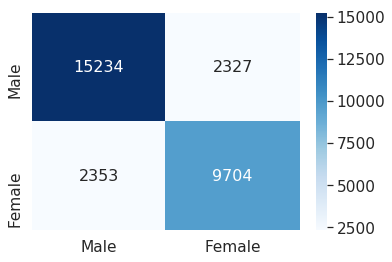

,mean_test_precision_score,mean_test_recall_score,mean_test_accuracy_score,param_max_depth,param_max_features,param_min_samples_split,param_n_estimators
95,0.805,0.806,0.841,25,0.75,10,300
94,0.804,0.806,0.841,25,0.75,10,100
88,0.804,0.805,0.841,25,0.5,10,100
89,0.804,0.806,0.841,25,0.5,10,300
92,0.804,0.802,0.840,25,0.75,5,100


/home/amoghg/anaconda3/lib/python3.6/site-packages/sklearn/externals/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


Best params for recall_score
{'max_depth': 15, 'max_features': 0.1, 'min_samples_split': 10, 'n_estimators': 300}
Accuracy: 84.14%
Precision Score: 79.23%
Recall Score: 82.72%
F1 Score: 0.809365

Confusion matrix of Random Forest optimized for recall_score on the test data:


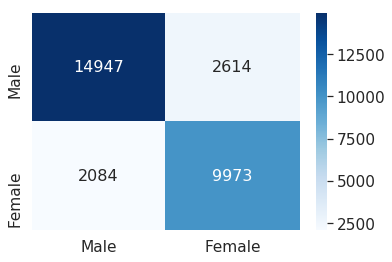

     pred_neg  pred_pos
neg     12489      5072
pos       916     11141


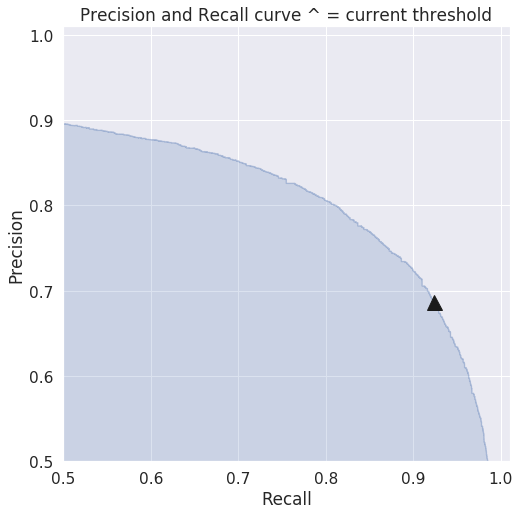

In [6]:
# Fitting Naive Bayes to the Training set
classifier = RandomForestClassifier(n_estimators = 100, n_jobs=-1)

# print(X_test[:10])

param_grid = {
    'min_samples_split': [3, 5, 10], 
    'n_estimators' : [100, 300],
    'max_depth': [3, 5, 15, 25],
    'max_features': [0.1, 0.25, 0.5, 0.75]
}

scorers = {
    'precision_score': make_scorer(precision_score),
    'recall_score': make_scorer(recall_score),
    'accuracy_score': make_scorer(accuracy_score)
}

def grid_search_wrapper(refit_score='recall_score'):
    """
    fits a GridSearchCV classifier using refit_score for optimization
    prints classifier performance metrics
    """
    skf = StratifiedKFold(n_splits=10)
    grid_search = GridSearchCV(classifier, param_grid, scoring=scorers, refit=refit_score,
                           cv=skf, return_train_score=True, n_jobs=-1)
    grid_search.fit(X_train, y_train.ravel())

    # make the predictions
    y_pred = grid_search.predict(X_test)

    print('Best params for {}'.format(refit_score))
    print(grid_search.best_params_)
    
    print("Accuracy: {0:.2f}%".format(accuracy_score(y_test, y_pred)*100))
    print("Precision Score: {0:.2f}%".format(precision_score(y_test,y_pred)*100))
    print("Recall Score: {0:.2f}%".format(recall_score(y_test,y_pred)*100))
    print("F1 Score: {0:f}".format(f1_score(y_test,y_pred)))

    # confusion matrix on the test data.
    print('\nConfusion matrix of Random Forest optimized for {} on the test data:'.format(refit_score))
#     print(pd.DataFrame(confusion_matrix(y_test, y_pred),
#                  columns=['male', 'female'], index=['M', 'F']))
    sn.set(font_scale=1.4)
    df_cm = pd.DataFrame(confusion_matrix(y_test, y_pred), index=['Male', 'Female'], columns=['Male', 'Female'])
    sn.heatmap(df_cm, annot=True,annot_kws={"size": 16}, cmap='Blues', fmt='g')
    plt.show()
    return grid_search

grid_search_clf = grid_search_wrapper(refit_score='precision_score')

results = pd.DataFrame(grid_search_clf.cv_results_)
results = results.sort_values(by='mean_test_precision_score', ascending=False)
display(results[['mean_test_precision_score', 'mean_test_recall_score', 'mean_test_accuracy_score', 'param_max_depth', 'param_max_features', 'param_min_samples_split', 'param_n_estimators']].round(3).head())

grid_search_clf = grid_search_wrapper(refit_score='recall_score')

results = pd.DataFrame(grid_search_clf.cv_results_)
results = results.sort_values(by='mean_test_precision_score', ascending=False)
results[['mean_test_precision_score', 'mean_test_recall_score', 'mean_test_accuracy_score', 'param_max_depth', 'param_max_features', 'param_min_samples_split', 'param_n_estimators']].round(3).head()

classifier.fit(X_train, y_train.ravel())

# # Predicting the Test set results
# y_pred = classifier.predict(X_test)

y_scores = classifier.predict_proba(X_test)[:, 1]
p, r, thresholds = precision_recall_curve(y_test, y_scores)

def adjusted_classes(y_scores, t):
    """
    This function adjusts class predictions based on the prediction threshold (t).
    Will only work for binary classification problems.
    """
    return [1 if y >= t else 0 for y in y_scores]

def precision_recall_threshold(p, r, thresholds, t=0.5):
    """
    plots the precision recall curve and shows the current value for each
    by identifying the classifier's threshold (t).
    """
    
    # generate new class predictions based on the adjusted_classes
    # function above and view the resulting confusion matrix.
    y_pred_adj = adjusted_classes(y_scores, t)
    print(pd.DataFrame(confusion_matrix(y_test, y_pred_adj),
                       columns=['pred_neg', 'pred_pos'], 
                       index=['neg', 'pos']))
    
    # plot the curve
    plt.figure(figsize=(8,8))
    plt.title("Precision and Recall curve ^ = current threshold")
    plt.step(r, p, color='b', alpha=0.2,
             where='post')
    plt.fill_between(r, p, step='post', alpha=0.2,
                     color='b')
    plt.ylim([0.5, 1.01]);
    plt.xlim([0.5, 1.01]);
    plt.xlabel('Recall');
    plt.ylabel('Precision');
    
    # plot the current threshold on the line
    close_default_clf = np.argmin(np.abs(thresholds - t))
    plt.plot(r[close_default_clf], p[close_default_clf], '^', c='k',
            markersize=15)
    
threshold = 0.20
precision_recall_threshold(p, r, thresholds, threshold)
threshold += 0.01

### Validating

In [ ]:
cm = confusion_matrix(y_test, y_pred)

print("Accuracy: {0:.2f}%".format(accuracy_score(y_test, y_pred)*100))
print("Precision Score: {0:.2f}%".format(precision_score(y_test,y_pred)*100))
print("Recall Score: {0:.2f}%".format(recall_score(y_test,y_pred)*100))
print("F1 Score: {0:f}".format(f1_score(y_test,y_pred)))

df_cm = pd.DataFrame(cm, index=['Male', 'Female'], columns=['Male', 'Female'])
# plt.figure(figsize = (10,7))
print("\nconfusion Matrix: ")
sn.set(font_scale=1.4)
sn.heatmap(df_cm, annot=True,annot_kws={"size": 16}, cmap='Blues', fmt='g')
plt.show()

# scatter_plot(X_train, y_train, 'Gender Classification Training Data', 'male', 'female')
# scatter_plot(X_test, y_test, 'Gender Classification Testing Data', 'male', 'female')
# scatter_plot(X_test, y_pred, 'Gender Classification Predicted Data', 'male', 'female')
